In [1]:
#import basic libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

import re

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.multioutput import MultiOutputRegressor

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [2]:
df_train=pd.read_excel(r'C:\Users\Data_Train.xlsx')
df_test=pd.read_excel(r'C:\Users\Data_Test.xlsx')

In [3]:
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
print('Train_data:',df_train.shape)
print('Test_data:',df_test.shape)

Train_data: (12690, 9)
Test_data: (4231, 8)


In [6]:
df_train.to_csv('Restaurant_food_cost_Train.csv')
df_test.to_csv('Restaurant_food_cost_Test.csv')

In [7]:
df=df_train.append(df_test,ignore_index=True)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [8]:
print(df_train.shape,df_test.shape,df.shape)

(12690, 9) (4231, 8) (16921, 9)


In [9]:
df.shape

(16921, 9)

In [10]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [11]:
df.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


Observations:
    1.Null values are present in some features.
    2.Cost is the target variable and the missing values present in  this 
    column is from test data.
    3.All the features are string data type except cost,is float data type.

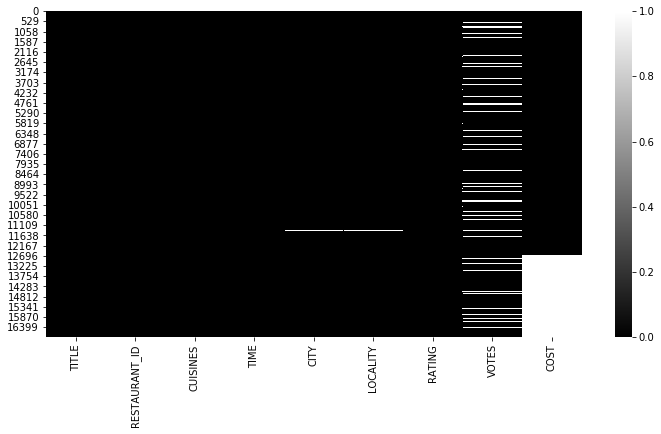

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='gray')

In [14]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [15]:
df.describe()

,RESTAURANT_ID,COST
count,16921.000000,12690.000000
mean,7767.211631,655.252246
std,4493.287626,627.003540
min,0.000000,20.000000
25%,3873.000000,300.000000
50%,7751.000000,500.000000
75%,11672.000000,800.000000
max,15573.000000,14000.000000


### Exploratory Data Analysis

In [16]:
for i in df.columns:
    print(i)
    print('num of unique values -->',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('*********************************************************')

TITLE
num of unique values --> 123
count           16921
unique            123
top       QUICK BITES
freq             5634
Name: TITLE, dtype: object
*********************************************************
RESTAURANT_ID
num of unique values --> 15574
count    16921.000000
mean      7767.211631
std       4493.287626
min          0.000000
25%       3873.000000
50%       7751.000000
75%      11672.000000
max      15573.000000
Name: RESTAURANT_ID, dtype: float64
*********************************************************
CUISINES
num of unique values --> 5183
count            16921
unique            5183
top       North Indian
freq               716
Name: CUISINES, dtype: object
*********************************************************
TIME
num of unique values --> 3295
count                     16921
unique                     3295
top       11am – 11pm (Mon-Sun)
freq                       1862
Name: TIME, dtype: object
*********************************************************
CITY
num of

### Data Cleaning

In [17]:
#Votes
df['VOTES'].value_counts()

44 votes       92
22 votes       88
6 votes        87
29 votes       83
28 votes       81
               ..
1858 votes      1
4147 votes      1
14910 votes     1
1912 votes      1
3159 votes      1
Name: VOTES, Length: 2075, dtype: int64

In [18]:
df[df['VOTES'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,-,NaN,400.0
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200.0
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200.0
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,-,NaN,300.0
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800.0
...,...,...,...,...,...,...,...,...,...
16873,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,NEW,NaN,NaN
16875,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,NEW,NaN,NaN
16888,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,NEW,NaN,NaN
16913,CASUAL DINING,6887,"Sindhi, Street Food","11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",Mumbai,Lower Parel,NEW,NaN,NaN


In [19]:
new_vote=df["VOTES"].str.split(" ",n=1,expand=True)

In [20]:
df['votes_no']=new_vote[0]
df['votes']=new_vote[1]

In [21]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,165,votes


In [22]:
df['votes_no']=df['votes_no'].astype(float)

In [23]:
df['votes_no'].fillna(df['votes_no'].mode()[0],inplace=True)

In [24]:
df['votes_no']=df['votes_no'].astype(int)

In [25]:
df=df.drop(['VOTES','votes'],axis=1)

In [26]:
#Rating
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [27]:
df['RATING'].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.2       4
2.1       4
2.0       2
Name: RATING, dtype: int64

In [28]:
df['RATING']=df['RATING'].replace({'-':0.0,'NEW':5.0})

In [29]:
df['RATING']=df['RATING'].astype(float)

In [30]:
a=int(df['RATING'].mean())
df['RATING'].fillna(a,inplace=True)
df['RATING']=df['RATING'].astype(int)

In [31]:
#Locality
df['LOCALITY'].value_counts()

Gachibowli                       216
Indiranagar                      187
Kakkanad                         175
Kukatpally                       171
Madhapur                         169
                                ... 
P.O Kakkanad                       1
Ashok Vihar Phase 4                1
Near Vadapalani metro station      1
Kerala 683501                      1
Gandhinagar Yelahanka              1
Name: LOCALITY, Length: 1636, dtype: int64

In [32]:
df['LOCALITY']=df['LOCALITY'].fillna('Gachibowli')

In [38]:
#City
df['CITY'].value_counts()

Chennai                                      3002
Bangalore                                    2835
Hyderabad                                    2458
Mumbai                                       2311
New Delhi                                    1754
                                             ... 
MM Nagar                                        1
BTM 1st Stage                                   1
PVR plaza cinema building Connaught Place       1
Mumbai Veera Desai Area                         1
Telangana 500003                                1
Name: CITY, Length: 450, dtype: int64

In [33]:
#City
df['CITY']=df['CITY'].fillna('Chennai')

In [34]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING              0
COST             4231
votes_no            0
dtype: int64

In [35]:
#Separating categorical data and numerical data

cat_df,num_df=[],[]
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('Total number of features:',df.shape[1])
print('Number of categorical features:',len(cat_df))
print('Number of numerical features:',len(num_df))

Total number of features: 9
Number of categorical features: 5
Number of numerical features: 4


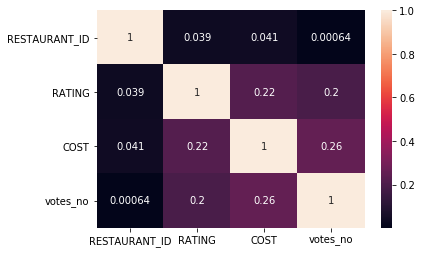

In [36]:
sns.heatmap(df.corr(),annot=True)

observation:
    1.Cost is negatively correlated with RESTAURANT ID.
    2.Cost is positively correlated to votes_no and RATING.
    3.RESTAURANT ID is negatively correlated to votes_no.

Skewness of RESTAURANT_ID = 0.01
Skewness of RATING = -1.33
Skewness of COST = 3.98
Skewness of votes_no = 12.78


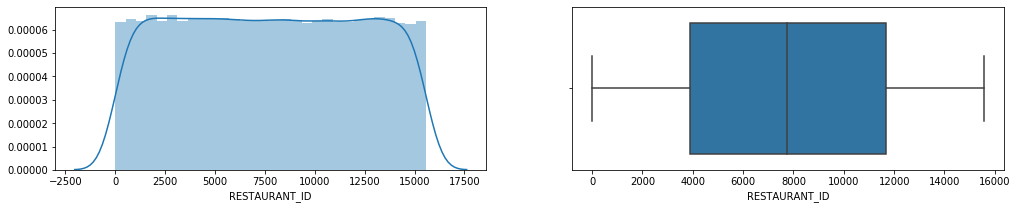

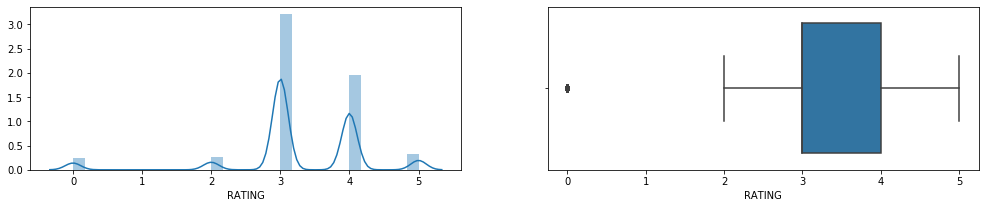

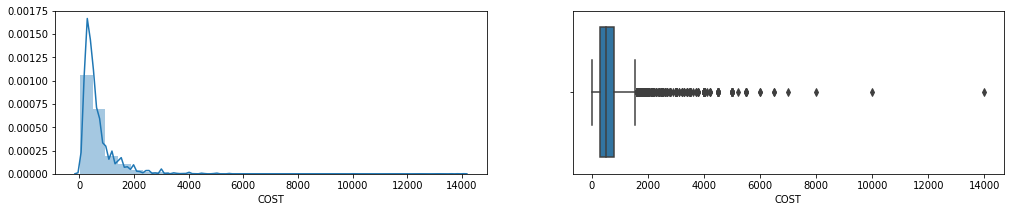

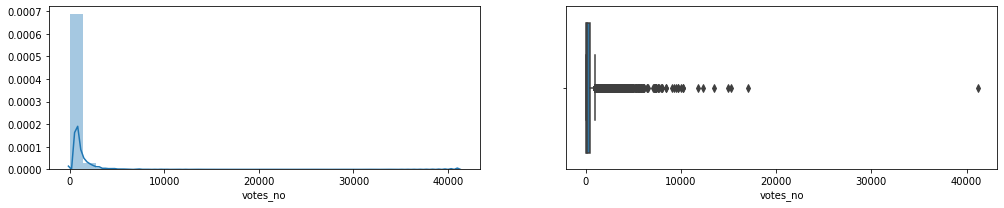

In [37]:
#Univariate analysis

for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i,df[i].skew()))

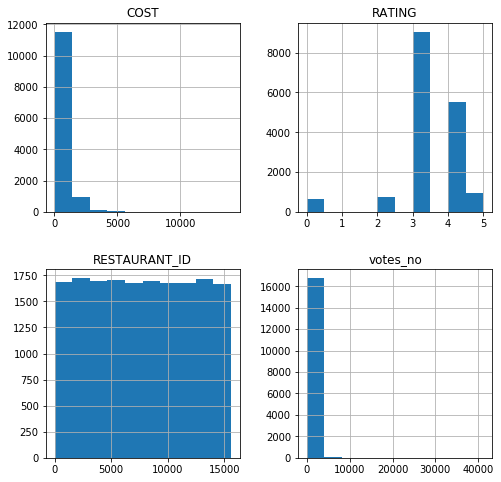

In [39]:
df.hist(figsize=(8,8))
plt.show()

In [40]:
df.drop(columns=['RESTAURANT_ID'],axis=1,inplace=True)

In [41]:
#Transforming categorical data into numerical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])


In [42]:
df.shape

(16921, 8)

In [43]:
df.index=range(0,16921)
df[df['COST'].isna()].head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no
12690,34,3878,1417,323,1314,3,NaN,561
12691,104,4879,2548,277,429,3,NaN,58
12692,34,4333,614,277,774,2,NaN,347
12693,95,631,2955,128,846,2,NaN,1315
12694,104,4891,586,216,570,2,NaN,20


In [44]:
#Splitting x and y variables

df_train=df[0:12690]
df_test=df[12690:].drop(columns=['COST'],axis=1)
x=df_train.drop(columns=['COST'],axis=1)
y=df_train['COST']

In [45]:
#Scaling the data
ss=StandardScaler()
x=ss.fit_transform(x)

### Model Training

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
print(x_train.shape,'\t\t',x_test.shape)

(10152, 7) 		 (2538, 7)


In [52]:
def models(model,x_train,x_test,y_train,y_test,score,rmse):
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    
    score.append(model.score(x_train,y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print('Accuracy score: %0.2f' %(model.score(x_train,y_train)*100))
    print('r2 score:',r2_score(y_test,y_pred))
    print('mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

In [49]:
#Instantiate all models
#call all models with default parameters
lreg=LinearRegression()
knr=KNeighborsRegressor()
rr=Ridge()
lr=Lasso()
enr=ElasticNet()
svr=SVR()
dct=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [50]:
all_models={'LinearRegression':lreg,
             'KNeighborsRegressor':knr,
             'Ridge':rr,
             'Lasso':lr,
             'ElasticNet':enr,
             'SVR':svr,
             'DecisionTreeRegressor':dct,
             'RandomForestRegressor':rf,
             'GradientBoostingRegressor':gbr,
             'AdaBoostRegressor':abr
           }

In [53]:
score,rmse=[],[]
for i,j in all_models.items():
    print('*********************',i,'***************************')
    models(j,x_train,x_test,y_train,y_test,score,rmse)

********************* LinearRegression ***************************
Accuracy score: 18.97
r2 score: 0.18788060726799305
mean absolute error: 315.6489108383543
root mean squared error: 540.6308035922088
********************* KNeighborsRegressor ***************************
Accuracy score: 62.31
r2 score: 0.39931857485914357
mean absolute error: 263.8451536643026
root mean squared error: 464.9571681808022
********************* Ridge ***************************
Accuracy score: 18.97
r2 score: 0.18788222816303224
mean absolute error: 315.648122165781
root mean squared error: 540.630264074108
********************* Lasso ***************************
Accuracy score: 18.97
r2 score: 0.18793501524593326
mean absolute error: 315.482448958788
root mean squared error: 540.612693495483
********************* ElasticNet ***************************
Accuracy score: 17.44
r2 score: 0.17688539225280497
mean absolute error: 321.5164876034158
root mean squared error: 544.2782765032929
********************* SV

In [55]:
pd.DataFrame([all_models.keys(),score,rmse],index=['Model name','Accuracy score',
                                                  'RMSE']).T.sort_values(by='Accuracy score',ascending=False)

,Model name,Accuracy score,RMSE
6,DecisionTreeRegressor,99.9986,413.353
7,RandomForestRegressor,95.9323,313.911
8,GradientBoostingRegressor,72.8981,319.198
1,KNeighborsRegressor,62.3091,464.957
0,LinearRegression,18.9713,540.631
2,Ridge,18.9713,540.63
3,Lasso,18.9696,540.613
4,ElasticNet,17.444,544.278
5,SVR,8.88977,569.826
9,AdaBoostRegressor,-44.4095,762.438


Observation: Highest accuracy score of 99.99% is achieved by Decision tree Regression.
    Maximum r2 score is achieved by Random Forest Regressor with accuracy of 95.93%.

In [56]:
cv_scores=cross_val_score(dct,x_train,y_train,cv=10)
cv_scores.mean()*100

42.848239403356644

In [57]:
cv_scores=cross_val_score(rf,x_train,y_train,cv=10)
cv_scores.mean()*100

70.5462164344688

In [61]:
#Saving the best model

import joblib
from joblib import dump

joblib.dump(dct,'DCT_Restaurant_Food_Cost.pkl')

['DCT_Restaurant_Food_Cost.pkl']